## ABC Model

In [42]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [43]:
# gravity
g = 9.81 # m/s^2

# water density
rhoSaltwater = 1023 # kg/m^3
rhoFreshwater = 1000 # kg/m^3

# pressure at 10 m
maxPressure = rhoSaltwater*g*10 # Pa

### Piston Parameters

In [55]:
# Actuator stroke
actStroke = 0.050 # meters

# Number of cylinders
numCyl = 2

# Radius of cylinders
cylRadius = 0.02 # meters

# Total area of piston heads
pistonArea = numCyl * np.pi * cylRadius**2 # m^2

# Total volume pistons can displace
maxVolPiston = numCyl*pistonArea*actStroke/2 # m^3
maxVolPistonmL = maxVolPiston*1e6

"Max displacement: {:3.1f} mL, or {:3.2f} N of buoyant force".format(maxVolPistonmL, maxVolPistonmL*0.00981)

# max force on actuator
maxForce = maxPressure*pistonArea

"Linear actuator will need to exert {:3.2f} N".format(maxForce)

'Max displacement: 125.7 mL, or 1.23 N of buoyant force'

'Linear actuator will need to exert 252.22 N'

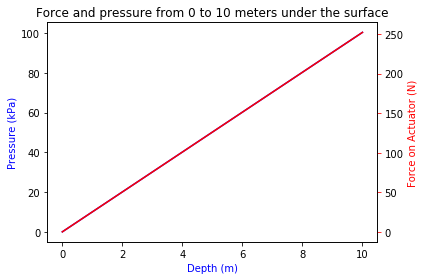

In [58]:
# depth
depth = np.arange(0,10.01,0.01)
P = rhoSaltwater*g*depth/1000
pistonForce = P*pistonArea*1000

fig, ax1 = plt.subplots()
ax1.plot(depth,P, 'b-')
ax1.set_ylabel('Pressure (kPa)',color='b')
ax1.set_xlabel('Depth (m)',color='b')

ax2 = ax1.twinx()
ax2.plot(depth,pistonForce,'r-')
ax2.set_ylabel('Force on Actuator (N)',color='r')
ax2.tick_params('y',color='r')

plt.title('Force and pressure from 0 to 10 meters under the surface')
fig.tight_layout()
plt.show()

### Model

In [14]:


# volume of craft
volDisp = 0.08 * 0.12 * 0.15 # m^3

# piston volume
volPiston = np.arange(0.001,0.011,0.001)

# total volume
totalVolume = volDisp + volPiston

# mass of craft
totalMass = 1 # kg

# bouyant force
F_bouy = g*totalVolume*rhoSaltwater # N

# drag coefficient
C_drag = 1.3

# cross-sectional area
A_cross = 0.12*0.15 # m^2

# Drag force
F_drag = np.sign(vel)*0.5*C_drag*A*rhoSaltwater*vel**2 # N

# Acceleration due to buoyancy control
acc = (F_bouy - totalMass*g -np.sign(vel)*F_drag)/totalMass # m/s^2

# velocity of craft (meters/sec)
vel = np.arange(0.1,1+.1,0.1)



[ 0.0999375  0.39975    0.8994375  1.599      2.4984375  3.59775    4.8969375
  6.396      8.0949375  9.99375  ]
